# Sicherungsgeschäfte (Hedging)

Du solltest dir das Video für eine komplette Erklärung ansehen!

In [163]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [164]:
# Daten für die ausgewählten Zeiträume und Posten erfassen
start = '2016-01-01'
end = '2017-01-01'
asset = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark = get_pricing('SPY', fields='price', start_date=start, end_date=end)

In [165]:
asset_ret = asset.pct_change()[1:]
bench_ret = benchmark.pct_change()[1:]

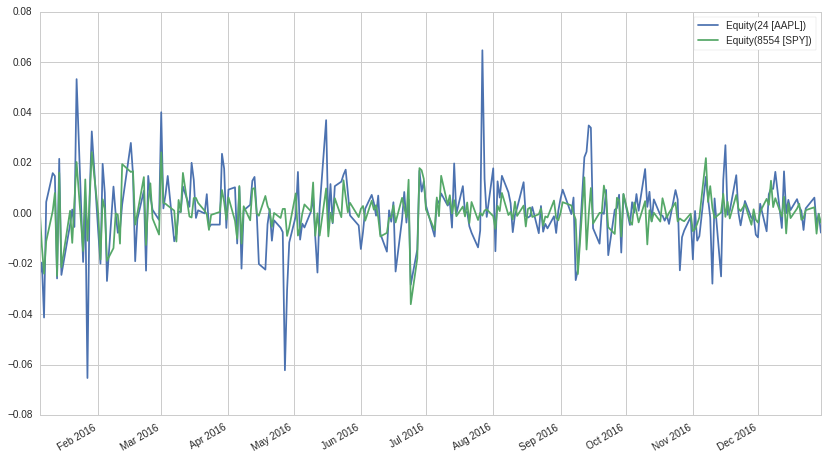

In [166]:
asset_ret.plot()
bench_ret.plot()
plt.legend()

## Regression für Alpha- und Beta-Werte

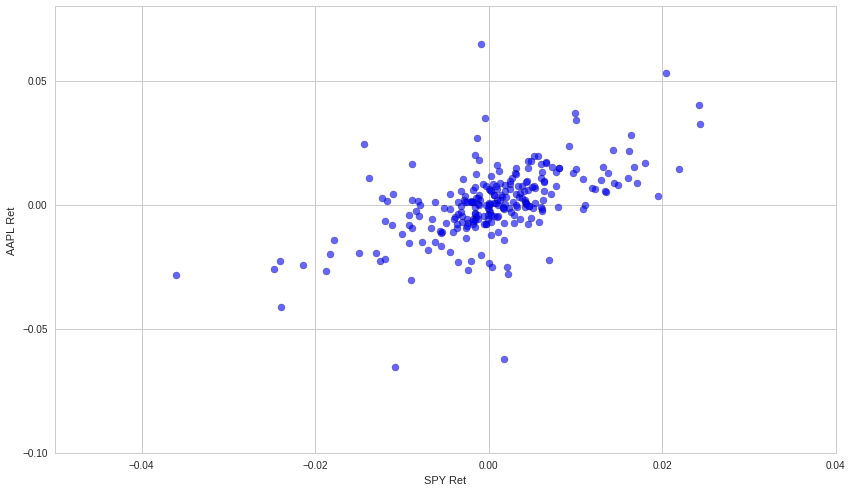

In [167]:
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)
plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

In [168]:
AAPL = asset_ret.values
spy = bench_ret.values

In [169]:
# Konstante addieren (Spalte von 1s für Unterbrechung)
spy_constant = sm.add_constant(spy)

# Regression an Daten anpassen
model = regression.linear_model.OLS(AAPL,spy_constant).fit()

In [170]:
model.params

array([  1.67990248e-05,   1.02981370e+00])

In [171]:
alpha , beta = model.params

In [172]:
alpha

1.6799024809993564e-05

In [173]:
beta

1.0298136979465768

###  Alpha und Beta grafisch darstellen

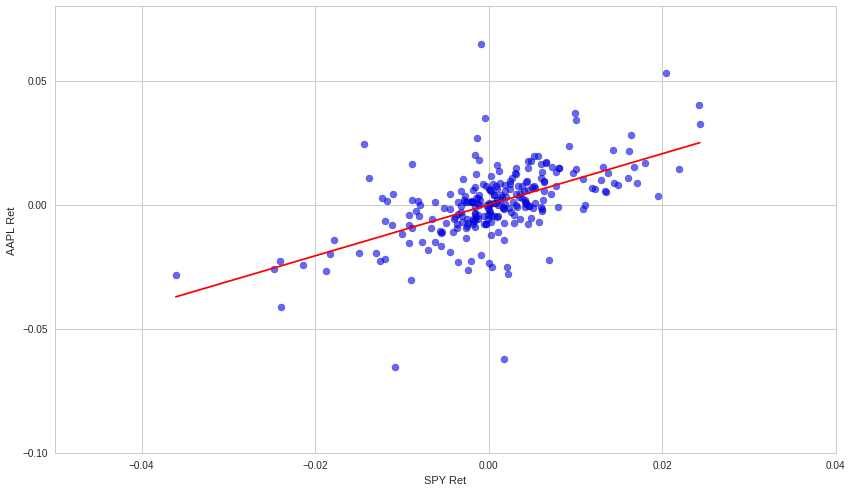

In [174]:
# zurückgegebene Streuung
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)

# Anpassungslinie (Fit Line)
min_spy = bench_ret.values.min()
max_spy = bench_ret.values.max()

spy_line = np.linspace(min_spy,max_spy,100)
y = spy_line * beta + alpha

plt.plot(spy_line,y,'r')

plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

## Hedge implementieren

In [175]:
hedged = -1*beta*bench_ret + asset_ret

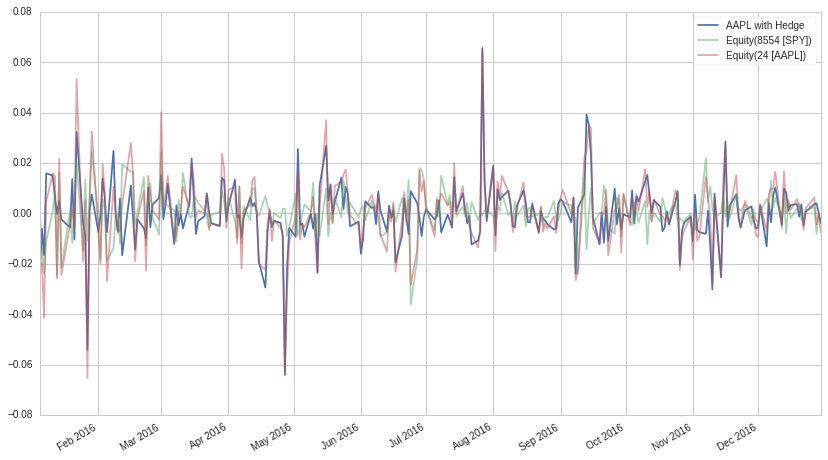

In [176]:
hedged.plot(label='AAPL with Hedge')
bench_ret.plot(alpha=0.5)
asset_ret.plot(alpha=0.5)
plt.legend()

#### Was passiert bei einem großen Abfall des Markts?

In [177]:
hedged.plot(label='AAPL with Hedge')
bench_ret.plot()
asset_ret.plot()
plt.xlim(['2016-06-01','2016-08-01'])
plt.legend()

### Effekte des Hedgings

In [178]:
def alpha_beta(benchmark_ret,stock):
    
    benchmark = sm.add_constant(benchmark_ret)
    
    model = regression.linear_model.OLS(stock,benchmark).fit()
    
    return model.params[0], model.params[1]

** 2016-2017 Alpha und Beta **

In [179]:
# Alpha- und Beta-Schätzungen des letzten Jahres erfassen
start = '2016-01-01'
end = '2017-01-01'

asset2016 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark2016 = get_pricing('SPY', fields='price', start_date=start, end_date=end)

asset_ret2016 = asset2016.pct_change()[1:]
benchmark_ret2016 = benchmark2016.pct_change()[1:]

aret_val = asset_ret2016.values
bret_val = benchmark_ret2016.values

alpha2016, beta2016 = alpha_beta(bret_val,aret_val)

print('2016 Based Figures')
print('alpha: ' + str(alpha2016))
print('beta: ' + str(beta2016))

2016 Based Figures
alpha: 1.679902481e-05
beta: 1.02981369795


** Portfolio erstellen **

In [180]:
# Grundgeschäfte-Portfolio erstellen und Alpha und Beta berechnen
portfolio = -1*beta2016*benchmark_ret2016 + asset_ret2016

alpha, beta = alpha_beta(benchmark_ret2016,portfolio)
print('Portfolio with Alphas and Betas:')
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))

Portfolio with Alphas and Betas:
alpha: 1.679902481e-05
beta: 1.36609473733e-16


In [181]:
# Die Renditen des Portfolios sowie das Vermögen selbst grafisch darstellen
portfolio.plot(alpha=0.9,label='AAPL with Hedge')
asset_ret2016.plot(alpha=0.5);
benchmark_ret2016.plot(alpha=0.5)
plt.ylabel("Daily Return")
plt.legend();

In [182]:
portfolio.mean()

1.6799024809993652e-05

In [183]:
asset_ret2016.mean()

0.000574549568770769

In [184]:
portfolio.std()

0.012065447808277703

In [185]:
asset_ret2016.std()

0.014702747344261722

_____

** Zahlen basierend auf 2017 **

In [186]:
# Daten für ein anderes Zeitfenster erfassen:
start = '2017-01-01'
end = '2017-08-01'

asset2017 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark2017 = get_pricing('SPY', fields='price', start_date=start, end_date=end)

asset_ret2017 = asset2017.pct_change()[1:]
benchmark_ret2017 = benchmark2017.pct_change()[1:]

aret_val = asset_ret2017.values
bret_val = benchmark_ret2017.values

alpha2017, beta2017 = alpha_beta(bret_val,aret_val)

print('2016 Based Figures')
print('alpha: ' + str(alpha2017))
print('beta: ' + str(beta2017))

2016 Based Figures
alpha: 0.000968854542346
beta: 1.26769880296


** Portfolio basierend auf Beta-Schätzungen von 2016 erstellen **

In [187]:
# Grundgeschäfte-Portfolio erstellen und Alpha und Beta berechnen
portfolio = -1*beta2016*benchmark_ret2017 + asset_ret2017

alpha, beta = alpha_beta(benchmark_ret2017,portfolio)
print 'Portfolio with Alphas and Betas Out of Sample:'
print 'alpha: ' + str(alpha)
print 'beta: ' + str(beta)

Portfolio with Alphas and Betas Out of Sample:
alpha: 0.000968854542346
beta: 0.23788510501


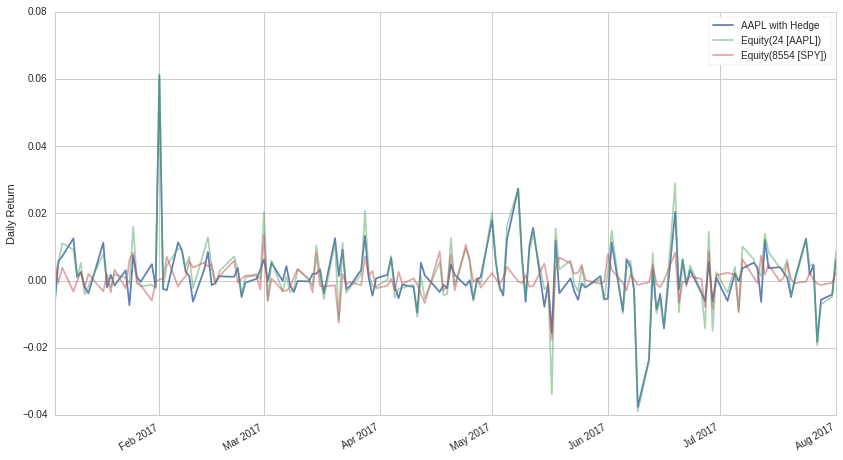

In [188]:
# Renditen des Portfolios und das Vermögen selbst grafisch darstellen
portfolio.plot(alpha=0.9,label='AAPL with Hedge')
asset_ret2017.plot(alpha=0.5);
benchmark_ret2017.plot(alpha=0.5)
plt.ylabel("Daily Return")
plt.legend();

Was genau sind die Effekte? Typischerweise, dass die mittleren Renditen für weniger Volatilität geopfert werden, aber das hängt auch stark vom Wertpapier ab:

In [189]:
portfolio.mean()

0.0011399935632582228

In [190]:
asset_ret2017.mean()

0.0018808609159293456

In [191]:
portfolio.std()

0.009066375411652783

In [192]:
asset_ret2017.std()

0.010484461271996029

# Super gemacht!